**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [7]:
params={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [9]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(rf,params,verbose=2)
clf

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [11]:
clf.fit(X_train,y_train)

C:\Users\Ishan SS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [12]:
params_df=pd.DataFrame(clf.cv_results_)
params_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086487,0.001664,0.014982,0.014822,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.813388,0.824754,0.819972,0.819371,0.004660,9
1,0.376839,0.007663,0.018279,0.000462,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812122,0.820253,0.813221,0.815199,0.003602,14
2,0.736275,0.006105,0.036216,0.001863,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810997,0.819550,0.811111,0.813886,0.004005,16
3,1.516524,0.053482,0.070295,0.000421,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811419,0.819409,0.813502,0.814777,0.003384,15
4,0.144976,0.005912,0.005973,0.000831,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814653,0.823347,0.819831,0.819277,0.003571,11
5,0.657674,0.015006,0.024581,0.000922,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815919,0.824332,0.820956,0.820402,0.003457,4
6,1.296380,0.012920,0.046215,0.000490,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815216,0.824473,0.821378,0.820355,0.003848,5
7,2.610337,0.039518,0.092252,0.002890,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815638,0.824473,0.821800,0.820637,0.003700,1
8,0.183550,0.000785,0.006972,0.000006,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.812403,0.821378,0.816737,0.816839,0.003665,13
9,0.902728,0.002098,0.031239,0.000478,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.813810,0.823347,0.820816,0.819324,0.004034,10


**Find the best hyperparameters from the cross-validation.**

In [13]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [17]:
mean_test_scores=params_df['mean_test_score'].to_numpy()
mean_test_scores=np.reshape(mean_test_scores,(4,4))
print(mean_test_scores.shape)
mean_test_scores

(4, 4)


array([[0.81937087, 0.81519854, 0.81388589, 0.81477662],
       [0.81927711, 0.82040223, 0.82035535, 0.82063663],
       [0.81683934, 0.81932399, 0.81951151, 0.82016783],
       [0.81707374, 0.82026159, 0.82054287, 0.82063663]])

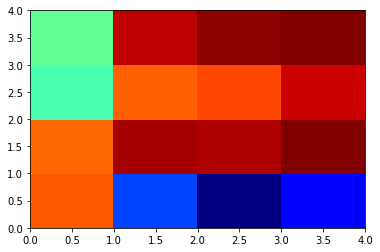

In [21]:
# Create a 5x5 grid
plt.pcolormesh(mean_test_scores,cmap=plt.cm.jet)

In [ ]:
# Set color map to `plt.cm.jet`


In [ ]:
# Visualize pcolormesh


________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [ ]:
# Create a dataframe of the feature names and importance


In [ ]:
# Sort values by importance
